In [ ]:
%matplotlib inline


# Decision boundary of label propagation versus SVM on the Iris dataset


Comparison for decision boundary generated on iris dataset
between Label Propagation and SVM.

This demonstrates Label Propagation learning a good boundary
even with a small amount of labeled data.




Automatically created module for IPython interactive environment
[[5.1 3.5]
 [4.9 3.0]
 [4.7 3.2]
 [4.6 3.1]
 [5.0 3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.0 3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3.0]
 [4.3 3.0]
 [5.8 4.0]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.0 3.0]
 [5.0 3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.0 3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3.0]
 [5.1 3.4]
 [5.0 3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.0 3.5]
 [5.1 3.8]
 [4.8 3.0]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.0 3.3]
 [7.0 3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.0 2.0]
 [5.9 3.0]
 [6.0 2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3.0]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3.0]
 [6.8 2.8]
 [6.7 3.0]
 [6.0 2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.0 2.7]
 [5.4 3.0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


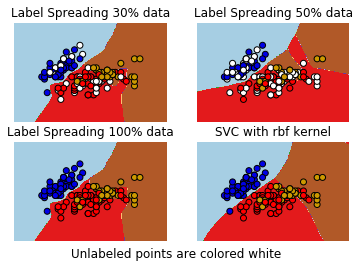

In [2]:
print(__doc__)

# Authors: Clay Woolam <clay@woolam.org>
# License: BSD

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import label_propagation
import pandas as pd

mydata = pd.read_csv("iris.csv") 
dt = mydata.values

X = dt[:, :2]
print(X)

y = dt[:, 3]
y = y.astype('int')
print(y)
rng = np.random.RandomState(0)

#iris = datasets.load_iris()

#X = iris.data[:, :2]
#y = iris.target

# step size in the mesh
h = .02

y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.3] = -1
y_50 = np.copy(y)
y_50[rng.rand(len(y)) < 0.5] = -1
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (label_propagation.LabelSpreading().fit(X, y_30),
        y_30)
ls50 = (label_propagation.LabelSpreading().fit(X, y_50),
        y_50)
ls100 = (label_propagation.LabelSpreading().fit(X, y), y)
rbf_svc = (svm.SVC(kernel='rbf').fit(X, y), y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['Label Spreading 30% data',
          'Label Spreading 50% data',
          'Label Spreading 100% data',
          'SVC with rbf kernel']

color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}

for i, (clf, y_train) in enumerate((ls30, ls50, ls100, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')

    plt.title(titles[i])

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()